# Исследование гипотез по увеличению выручки интернет-магазина

Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.

**Цель:** понять, какие гипотезы помогут увеличить выручку.

**План работы:**
    - приоритизировать гипотезы
    - отобрать рабочие
    - запустить A/B-тест
    - проанализировать результаты

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Часть 1. Приоритизация гипотез.

In [2]:
# Откроем файл с данными и изучим общую информацию.
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


В файле видим 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Можем оценить эти гипотезы и приоритизировать их.

Для этого воспользуемся двумя методами приоритизации ICE и RICE. Они оценивают гипотезы по некоторым критериям. В ICE входят три критерия (I*C/E):

- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько мы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

При использовании RICE добавляется еще четвертый (R*I*C/E): 

- Reach — скольких пользователей затронет изменение, которое мы хотитим внести.


Сначала применим фреймворк **ICE** для приоритизации гипотез.

In [3]:
pd.options.display.max_colwidth = 150
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Теперь попробуем применить фреймворк **RICE** для приоритизации гипотез (учтем охват пользователей).

In [4]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Видим, что приоритеты в гипотезах сменились. Если в первом случае в топе были 9, 1 и 8 гипотезы, то во втором случае в топ три попали 8, 3 и 1 гипотезы. Это произошло потому, что гипотеза с запуском акции имеет очень низкую оценку по критерию количества пользователей, которых затронет это изменение. При этом на 4 месте в обоих случаях оказывается 7 гипотеза. Если делать выводы по двум проверкам (не уверена, что так можно, кстати), то топ 3 гипотезы будут 1, 7, 8.

## Часть 2. Анализ A/B-теста.

Был проведен A/B-тест, результаты которого необходимо изучить и проанализировать.

Откроем файлы с данными и изучим общую информацию.

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
# поменяем формат столбцов с датами на тип "дата"
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
# проверим наличие пропусков
print(orders.isna().sum())
print(visitors.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


In [12]:
# проверим наличие дубликатов
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


In [13]:
# посмотрим сколько групп в тесте
orders.group.unique()

array(['B', 'A'], dtype=object)

In [14]:
# посмотрим также на даты начала и окончания теста
print(orders.date.min())
print(orders.date.max())

2019-08-01 00:00:00
2019-08-31 00:00:00


In [15]:
# также посмотрим на количество человек в каждой группе
print(orders.query('group == "A"')['visitorId'].nunique())
print(orders.query('group == "B"')['visitorId'].nunique())

503
586


In [16]:
# посмотрим есть ли посетители попавшие в обе группы
visitor_group = orders.groupby('visitorId', as_index=False).agg({'group': 'nunique'})
visitor_group.head()

,visitorId,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


Выделим таких пользователей в отдельный список, чтобы отфильтровать исходные данные. Такие пользователи будут искажать результаты теста, поэтому мы не может использовать информацию по ним

In [17]:
dup_orders = visitor_group.query('group > 1')
orders = orders.query('visitorId not in @dup_orders.visitorId')
orders.shape

(1016, 5)

Соберем кумулятивные данные, чтобы построить и изучить графики кумулятивных значений.

In [18]:
# создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] \
                              .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1) \
                              .sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])] \
                                .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1) \
                                .sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Чтобы посмотреть на графики куммулятивной выручки и куммулятивного среднего чека, создадим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням по каждой группе

In [19]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

1. Построим график **кумулятивной выручки** по дням и группам A/B-тестирования.

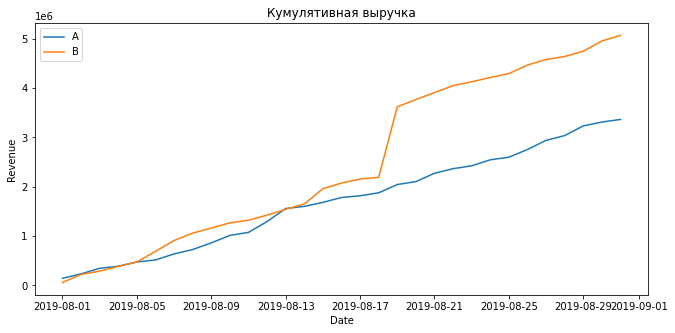

In [20]:
plt.figure(figsize=(11, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка')
plt.xlabel("Date")
plt.ylabel("Revenue");

Динамика увеличения выручки в целом положительная, что хорошо.
Однако на графике видим, что в группе В был резкий рост в районе 18 августа. Это может сигнализировать о всплеске числа заказов, но также и о появлении очень дорогих заказов в выборке (выбросы).

2. Построим также график **кумулятивного среднего чека** по дням и группам A/B-тестирования (разделим выручку на число заказов).

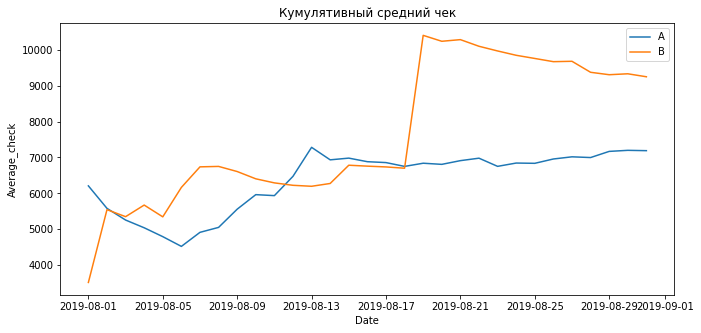

In [21]:
plt.figure(figsize=(11, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')

plt.legend() 
plt.title('Кумулятивный средний чек')
plt.xlabel("Date")
plt.ylabel("Average_check");

Средний чек становится равномерным ближе к концу теста. При этом тут мы также видим резкий скачок в группе В. Возможно, в группу B попали крупные дорогие заказы.

3. Теперь построим график **относительного изменения кумулятивного среднего чека** группы B к группе A.

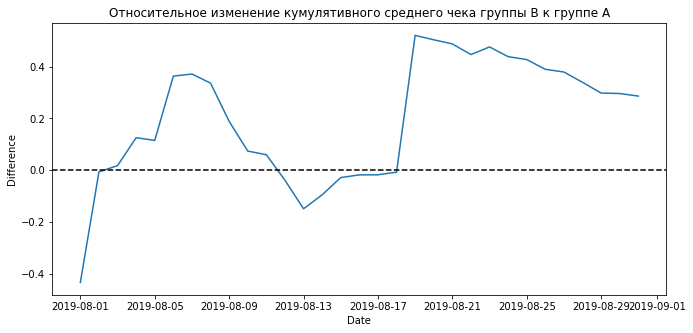

In [22]:
plt.figure(figsize=(11, 5))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel("Difference")
plt.xlabel("Date");

В начале группа В проигрывала, однако вырвалась вперед ближе к концу теста. Но возможно выбросы также оказали влияние, так как видим, что в нескольких точках график различия между сегментами резко «скачет».

В целом сейчас делать какие-либо выводы по тесту еще нельзя. Сперва стоит проанализировать аномалии, возможно, они изменят картину.

4. Посмотрим на график **кумулятивного среднего количества заказов на посетителя** по группам (отношение числа заказов к количеству посетителей).

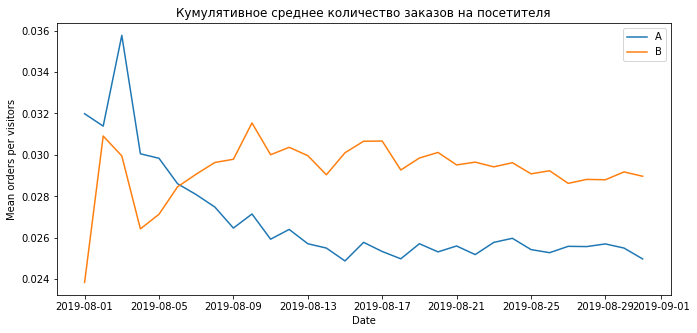

In [23]:
plt.figure(figsize=(11, 5)) 

# добавим нужную колонку к общим кумулятивным данным
cumulativeData['avg_orders'] = cumulativeData['orders']/cumulativeData['visitors']

# снова выделим данные в соответствие с группами
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# построим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['avg_orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['avg_orders'], label='B')

plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel("Date")
plt.ylabel("Mean orders per visitors");

В начале теста в группе А показатель среднего количетсва заказов был выше, однако почти сразу вперед вышла группа В. На данный момент есть незначительные колебания значений, но в целом они зафиксировались около определенной величины. У группы А до сих пор наблюдается небольшое снижение показателя.

5. Построим график **относительного изменения кумулятивного среднего количества заказов** на посетителя группы B к группе A.

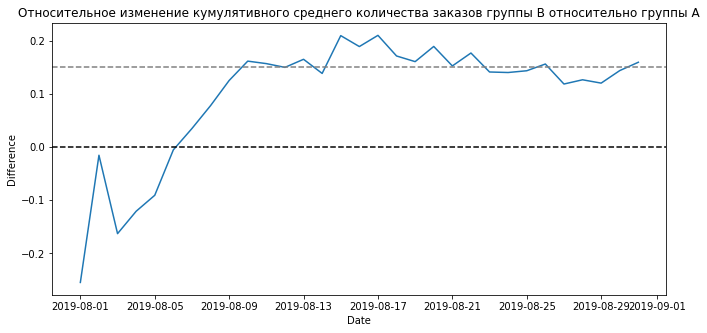

In [24]:
plt.figure(figsize=(11, 5))

# объединим данные кумулятивного среднего количества заказов в группах
mergedCumulativeConversions = cumulativeDataA[['date','avg_orders']].merge(cumulativeDataB[['date','avg_orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# построим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['avg_ordersB']/mergedCumulativeConversions['avg_ordersA']-1)
plt.title('Относительное изменение кумулятивного среднего количества заказов группы B относительно группы A');

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Difference");

Группа В лидирует по среднему количеству заказов практически с самого начала теста. На данный момент показатель колеблется в районе 15%, но незначительно.

Теперь проанализируем выбросы (крайние значения в данных).

6. Построим **точечный график количества заказов** по пользователям.

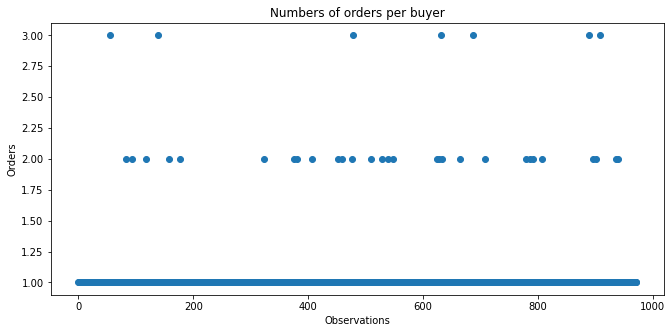

In [25]:
# Подсчитаем количество заказов по пользователям
plt.figure(figsize=(11, 5))
ordersByUsers = (orders.groupby('visitorId', as_index=False) \
                       .agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['userId', 'orders']

# Построим точечную диаграмму числа заказов на одного пользователя

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Numbers of orders per buyer')
plt.xlabel("Observations")
plt.ylabel("Orders");

Видим, что большинство людей делает оп одному заказу, но есть также те, кто делает по 2 и 3 заказа. Но точная их доля не ясна, чтобы счесть их выбросами. Чтобы это узнать, посчитаем выборочные перцентили.

7. Посчитаем **95-й и 99-й перцентили количества заказов** на пользователя.

In [26]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформляли больше чем 1 заказ. И 1% пользователей заказывали более двух раз. 
Так как принято отсеивать от 1% до 5% наблюдений с крайними значениями, разумно будет выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

8. Построим также **точечный график стоимостей заказов**.

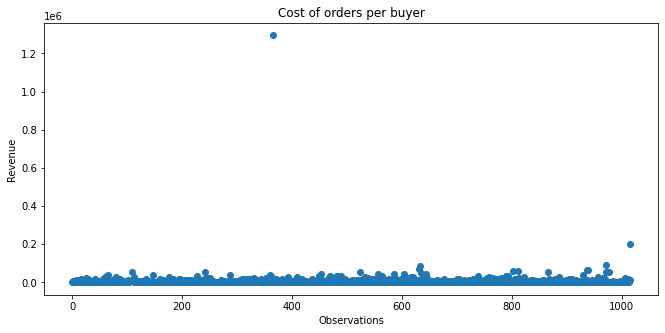

In [27]:
# Построим точечную диаграмму стоимости заказов
plt.figure(figsize=(11, 5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Cost of orders per buyer')
plt.xlabel("Observations")
plt.ylabel("Revenue");

На графике четко видим выбросы (очень дорогие заказы). Чтобы точнее определить их долю, посчитаем выборочные перцентили.

9. Посчитаем **95-й и 99-й перцентили стоимости заказов**.

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рубля. В данном случае можем определить границу в 26 785 рублей, чтобы отсеить самые сильные выбросы.

10. Посчитаем **статистическую значимость различий в среднем количестве заказов** на посетителя между группами по **«сырым»** данным (без удаления аномальных пользователей). Для этого будем использовать U-критерий Манна-Уитни, так как он подходит для оценки различий между двумя независимыми выборками, а также для оценки количественных признаков. 

Сформулируем гипотезы: 

- H0: различий в среднем количестве заказов между на посетителя группами нет
- H1: различия в среднем количестве заказов между на посетителя группами есть

Создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [29]:
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False) \
                                                .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False) \
                                                .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых каждый элемент — число заказов определённого пользователя, в том числе ноль (число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов).

In [30]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Применим критерий и отформатируем p-value.
Также выведем относительный прирост среднего числа заказов на посетителя группы B: среднее число заказов на посетителя группы B / среднее число заказов на посетителя группы A - 1.

In [31]:
print("P-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительное различие: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Относительное различие: 0.160


По «сырым» данным видим, что статистически значимые различия в среднем количестве заказов на посетителя групп A и B есть. 

p-value = 0.011 (первое значение) меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов на посетителя между группами нет, отвергаем. Относительный выигрыш группы B равен 16% (второе значение 0.160).

11. Посчитаем **статистическую значимость различий в среднем чеке заказа** между группами по **«сырым»** данным.

Сформулируем гипотезы: 

- H0: различий в среднем чеке между группами нет
- H1: различия в среднем чеке между группами есть

In [32]:
# применим критерий и найдём относительные различия в среднем чеке между группами

print('P-value: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительное различие: 0.287


P-value (первое значение) значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

При этом средний чек группы B значительно выше среднего чека группы A (второе значение).

Ранее в анализе мы обнаружили выбросы в данных. Найденные 95-й и 99-й перцентили средних чеков равны 26 785 и 53 904 рубля. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 26 785 рублей. Так мы уберём от 1% до 5% пользователей с дорогими заказами и большим количеством заказов. 

In [33]:
# Сделаем срез пользователей с числом заказов больше 2 — usersWithManyOrders

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsersA['orders'], 99)]['userId'], \
                                 ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsersA['orders'], 99)]['userId']],axis=0)

# Сделаем срез пользователей, совершивших заказы дороже 26 785 — usersWithExpensiveOrders

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']

# Объединим их в таблице abnormalUsers и посмотрим, сколько их всего

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())
print(abnormalUsers.shape[0])
# посмотрим также на аномальных пользователей в относительном выражении (%).

print(round((len(abnormalUsers)/ orders.visitorId.nunique() * 100), 2))

58
5.96


Видим, что таких пользователей всего 58. Узнаем, как их действия повлияли на результаты теста.

12. Посчитаем **статистическую значимость различий в среднем количестве заказов** на посетителя между группами по **«очищенным»** данным.

Сначала подготовим "очищенные" выборки количества заказов по пользователям по группам теста.

In [34]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']
                                           .isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']
                                           .isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [35]:
# Применим критерий 

print('P-value: {0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.012
Относительное различие: 0.182


По «очищенным» данным видим, что результаты по среднему количеству заказов на пользователя практически не изменились. Статистически значимые различия в среднем количестве заказов на пользователя групп A и B есть. 

p-value = 0.012 (первое значение) меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов на пользователя между группами нет, отвергаем. Относительный выигрыш (второе значение) группы B равен 18.2% (увеличился).

Теперь посчитаем **статистическую значимость различий в среднем чеке** заказа между группами по **«очищенным»** данным.

In [36]:
print(
    'P-value: {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное различие: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.646
Относительное различие: -0.048


P-value (первое значение) уменьшился, но всё еще значительно больше 0.05. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Однако изменилась разница между сегментами. Теперь средний чек группы B меньше среднего чека группы A на 4.8% (второе значение).

### 6. Вывод 

- Тест показал, что различия в среднем количестве заказов на пользователя групп А и В статистически значимы (как по "сырым", так и по "очищенным" данным): группа В выигрывает примерно на 18%
- При этом статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий нет
- График различия среднего количества заказов на пользователя между группами сообщает, что группа В лидирует по среднему количесвту заказов практически с самого начала теста. На данный момент показатель колеблется в районе 15%, но незначительно.
- График различия среднего чека также показывает, что несмотря на то, что группа В проигрывала в начале, далее вырвалась вперед. Но при этом видим, что в нескольких точках график различия между сегментами резко «скачет», при том, что были обнаружены выбросы.

На основании полученных данных рекомендуется остановить тест и зафиксировать победу группы В, как минимум в увеличении среднего количества заказов на пользователя.